In [11]:
!pip install pycaret

In [12]:
import pandas as pd
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [13]:
headers = [*pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data', nrows=1)]
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data', sep=',' , usecols=[c for c in headers if (c != 'motor_UPDRS' and c != 'subject#')])

In [14]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   total_UPDRS    5875 non-null   float64
 4   Jitter(%)      5875 non-null   float64
 5   Jitter(Abs)    5875 non-null   float64
 6   Jitter:RAP     5875 non-null   float64
 7   Jitter:PPQ5    5875 non-null   float64
 8   Jitter:DDP     5875 non-null   float64
 9   Shimmer        5875 non-null   float64
 10  Shimmer(dB)    5875 non-null   float64
 11  Shimmer:APQ3   5875 non-null   float64
 12  Shimmer:APQ5   5875 non-null   float64
 13  Shimmer:APQ11  5875 non-null   float64
 14  Shimmer:DDA    5875 non-null   float64
 15  NHR            5875 non-null   float64
 16  HNR            5875 non-null   float64
 17  RPDE           5875 non-null   float64
 18  DFA     

In [15]:
dataset.describe()

age          sex  ...          DFA          PPE
count  5875.000000  5875.000000  ...  5875.000000  5875.000000
mean     64.804936     0.317787  ...     0.653240     0.219589
std       8.821524     0.465656  ...     0.070902     0.091498
min      36.000000     0.000000  ...     0.514040     0.021983
25%      58.000000     0.000000  ...     0.596180     0.156340
50%      65.000000     0.000000  ...     0.643600     0.205500
75%      72.000000     1.000000  ...     0.711335     0.264490
max      85.000000     1.000000  ...     0.865600     0.731730

[8 rows x 20 columns]

In [16]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5288, 20)
Unseen Data For Predictions: (587, 20)


In [17]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'total_UPDRS', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target       total_UPDRS
2                            Original Data        (5288, 20)
3                           Missing Values             False
4                         Numeric Features                18
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (3701, 17)
10                    Transformed Test Set        (1587, 17)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              753d
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

# **Comparing All Models**

In [18]:
best = compare_models(exclude = ['ransac'])

Model      MAE       MSE     RMSE      R2  \
et                  Extra Trees Regressor   1.0590    3.2172   1.7832  0.9719   
rf                Random Forest Regressor   1.0314    3.7921   1.9364  0.9670   
lightgbm  Light Gradient Boosting Machine   1.4871    5.0685   2.2477  0.9558   
dt                Decision Tree Regressor   0.8336    8.0763   2.7824  0.9302   
gbr           Gradient Boosting Regressor   3.8688   24.2305   4.9188  0.7892   
ada                    AdaBoost Regressor   7.1769   67.7797   8.2305  0.4105   
knn                 K Neighbors Regressor   6.4272   70.7019   8.4040  0.3857   
lr                      Linear Regression   8.1274   96.1435   9.8035  0.1641   
lar                Least Angle Regression   8.1273   96.1423   9.8034  0.1641   
br                         Bayesian Ridge   8.1426   96.7777   9.8357  0.1586   
ridge                    Ridge Regression   8.1475   97.1510   9.8546  0.1554   
huber                     Huber Regressor   8.1394  100.5088  10.0216  0.1265   
en                            Elastic Net   8.4371  102.4321  10.1191  0.1095   
lasso                    Lasso Regression   8.4341  102.4703  10.1210  0.1092   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  13.6979  282.7747  16.4552 -1.4742   

           RMSLE    MAPE  TT (Sec)  
et        0.0963  0.0525     1.097  
rf        0.0937  0.0498     2.625  
lightgbm  0.1055  0.0676     0.254  
dt        0.1264  0.0393     0.052  
gbr       0.1980  0.1654     1.053  
ada       0.3196  0.3139     0.489  
knn       0.3123  0.2703     0.066  
lr        0.3644  0.3531     0.336  
lar       0.3644  0.3531     0.020  
br        0.3652  0.3539     0.019  
ridge     0.3661  0.3548     0.016  
huber     0.3654  0.3444     0.103  
en        0.3792  0.3722     0.017  
lasso     0.3796  0.3725     0.018  
omp       0.3859  0.3804     0.016  
llar      0.4068  0.4006     0.015  
dummy     0.4068  0.4006     0.013  
par       0.5807  0.5547     0.018

# **Create Some Model**
*italicized text*

In [19]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True
dummy                       Dummy Regressor  ...   True

[24 rows x 3 columns]

## **Extra Trees Regressor**

In [20]:
et = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.2112  4.2217  2.0547  0.9628  0.1176  0.0659
1     1.0827  3.2852  1.8125  0.9700  0.0941  0.0520
2     1.0475  3.2524  1.8034  0.9715  0.1053  0.0565
3     1.0693  3.0021  1.7327  0.9742  0.0971  0.0538
4     0.9525  2.1807  1.4767  0.9825  0.0749  0.0423
5     1.0626  3.1661  1.7794  0.9722  0.0961  0.0526
6     0.9921  2.9238  1.7099  0.9745  0.0969  0.0510
7     1.1401  4.6802  2.1634  0.9590  0.0964  0.0510
8     1.0715  3.0302  1.7407  0.9747  0.0936  0.0514
9     0.9609  2.4293  1.5586  0.9778  0.0912  0.0490
Mean  1.0590  3.2172  1.7832  0.9719  0.0963  0.0525
SD    0.0749  0.7085  0.1933  0.0065  0.0101  0.0056

In [21]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


## **Decision Tree Regressor**

In [22]:
dt = create_model('dt')

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     0.7638   7.7641  2.7864  0.9316  0.1300  0.0403
1     0.5536   3.0145  1.7362  0.9725  0.0848  0.0248
2     1.1458  12.5451  3.5419  0.8902  0.1804  0.0584
3     0.8235   6.4823  2.5460  0.9443  0.1328  0.0374
4     0.9045   9.6992  3.1143  0.9221  0.1393  0.0433
5     0.7239   5.3374  2.3103  0.9532  0.1044  0.0316
6     0.5523   4.9257  2.2194  0.9570  0.1055  0.0305
7     0.9237  11.7998  3.4351  0.8967  0.1274  0.0444
8     1.1908  12.2635  3.5019  0.8977  0.1342  0.0457
9     0.7539   6.9315  2.6328  0.9367  0.1256  0.0362
Mean  0.8336   8.0763  2.7824  0.9302  0.1264  0.0393
SD    0.2047   3.1781  0.5782  0.0267  0.0242  0.0090

In [23]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## **Random Forest Regressor**

In [24]:
rf = create_model('rf')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.1943  4.7896  2.1885  0.9578  0.1273  0.0684
1     0.8924  2.5701  1.6031  0.9765  0.0756  0.0409
2     1.0651  4.0759  2.0189  0.9643  0.1040  0.0555
3     1.0664  3.5785  1.8917  0.9693  0.0990  0.0527
4     1.0003  3.0044  1.7333  0.9759  0.0836  0.0457
5     1.0459  4.3594  2.0879  0.9618  0.0934  0.0479
6     0.9869  4.2050  2.0506  0.9633  0.0946  0.0467
7     1.0274  5.0828  2.2545  0.9555  0.0853  0.0438
8     1.0112  2.9194  1.7086  0.9757  0.0759  0.0436
9     1.0245  3.3362  1.8265  0.9696  0.0980  0.0526
Mean  1.0314  3.7921  1.9364  0.9670  0.0937  0.0498
SD    0.0720  0.7977  0.2064  0.0072  0.0145  0.0076

In [25]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# **Tune a Model**

## **tuned et**

In [26]:
tuned_et = tune_model(et)

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     3.6102  22.2667  4.7188  0.8039  0.2275  0.1832
1     3.4985  20.4276  4.5197  0.8134  0.1969  0.1579
2     3.5225  21.1884  4.6031  0.8145  0.2262  0.1829
3     3.4756  20.1030  4.4836  0.8273  0.2098  0.1684
4     3.4096  19.2016  4.3820  0.8458  0.1848  0.1449
5     3.4560  19.1016  4.3705  0.8326  0.1978  0.1587
6     3.6822  22.5420  4.7478  0.8032  0.2143  0.1755
7     3.6908  22.9043  4.7858  0.7995  0.1887  0.1532
8     3.5196  20.1262  4.4862  0.8322  0.1883  0.1525
9     3.3423  18.5180  4.3033  0.8310  0.1886  0.1510
Mean  3.5208  20.6379  4.5401  0.8203  0.2023  0.1628
SD    0.1067   1.4570  0.1599  0.0148  0.0153  0.0131

In [27]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


## **Tuned dt**

In [28]:
tuned_dt = tune_model(dt)

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     1.5648  12.0473  3.4709  0.8939  0.1534  0.0811
1     1.4727   7.6537  2.7665  0.9301  0.1147  0.0634
2     1.4837  10.0079  3.1635  0.9124  0.1552  0.0695
3     1.3048   7.3116  2.7040  0.9372  0.1409  0.0585
4     1.4089  10.2192  3.1967  0.9179  0.1429  0.0655
5     1.2155   6.6956  2.5876  0.9413  0.1048  0.0492
6     1.1574   6.9091  2.6285  0.9397  0.1124  0.0541
7     1.2876  11.7930  3.4341  0.8968  0.1276  0.0583
8     1.7807  13.2437  3.6392  0.8896  0.1321  0.0707
9     1.1755   7.7111  2.7769  0.9296  0.1340  0.0557
Mean  1.3851   9.3592  3.0368  0.9188  0.1318  0.0626
SD    0.1863   2.2872  0.3702  0.0188  0.0163  0.0089

In [29]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## **Tuned rf**

In [30]:
tuned_rf = tune_model(rf)

MAE      MSE    RMSE      R2   RMSLE    MAPE
0     2.3719  11.3189  3.3644  0.9003  0.1724  0.1221
1     2.0961   7.9618  2.8217  0.9273  0.1267  0.0932
2     2.3285  10.1557  3.1868  0.9111  0.1548  0.1140
3     2.2018   9.1101  3.0183  0.9217  0.1435  0.1039
4     2.1615   8.7799  2.9631  0.9295  0.1291  0.0919
5     2.1645   9.6768  3.1108  0.9152  0.1315  0.0931
6     2.2539  10.2799  3.2062  0.9102  0.1426  0.1031
7     2.2397  10.9025  3.3019  0.9046  0.1248  0.0904
8     2.2348   8.9561  2.9927  0.9253  0.1248  0.0932
9     2.0458   8.0315  2.8340  0.9267  0.1341  0.0951
Mean  2.2099   9.5173  3.0800  0.9172  0.1384  0.1000
SD    0.0939   1.0877  0.1763  0.0098  0.0146  0.0102

In [31]:
print(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# **Plot some Model**

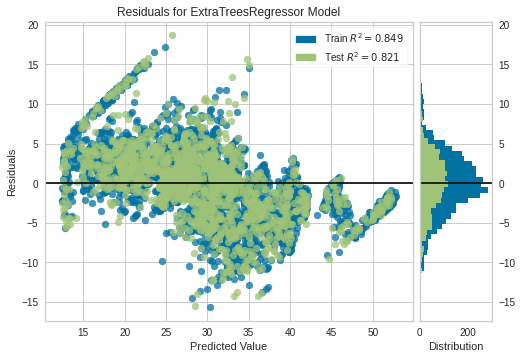

In [32]:
plot_model(tuned_et)

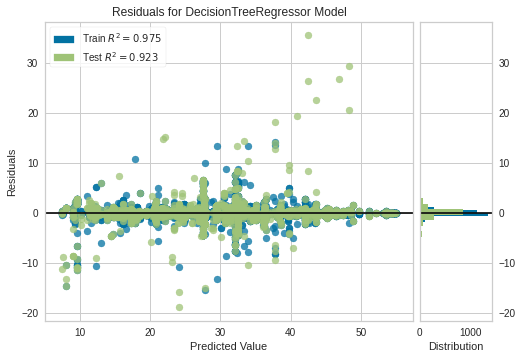

In [33]:
plot_model(tuned_dt)

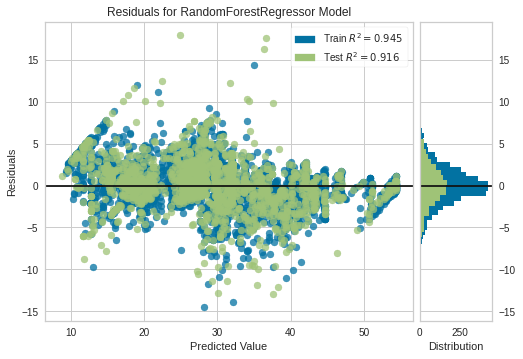

In [34]:
plot_model(tuned_rf)

# **Prediction error plot**

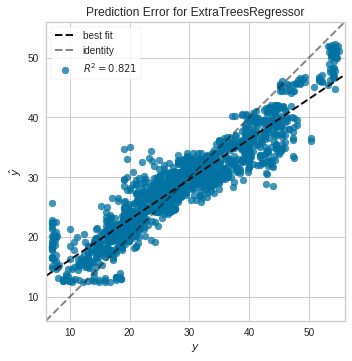

In [35]:
plot_model(tuned_et, plot = 'error')

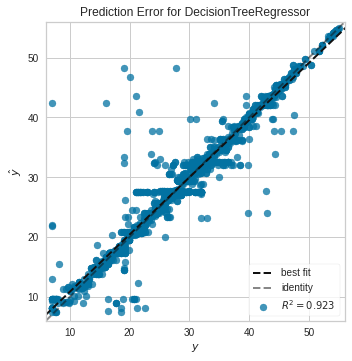

In [36]:
plot_model(tuned_dt, plot = 'error')

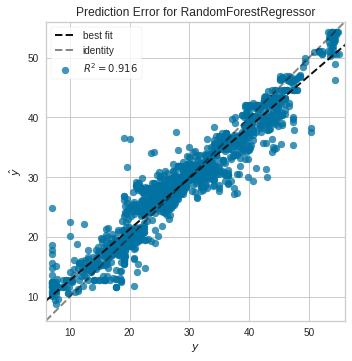

In [37]:
plot_model(tuned_rf, plot = 'error')

# **Feature Importance Plot**

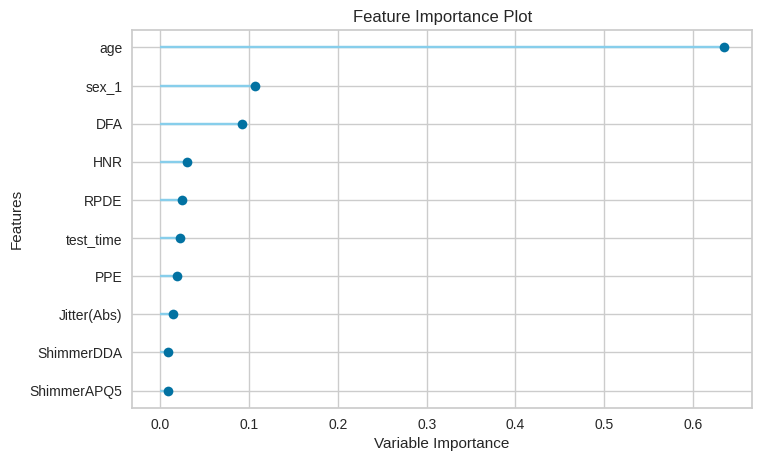

In [38]:
plot_model(tuned_et, plot = 'feature')

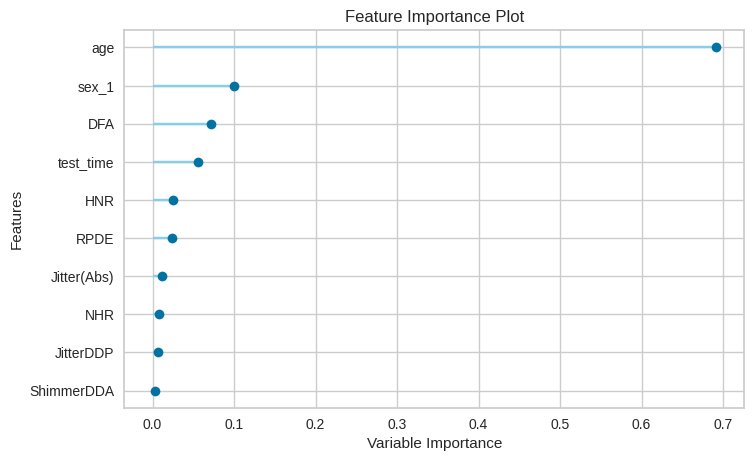

In [39]:
plot_model(tuned_dt, plot = 'feature')

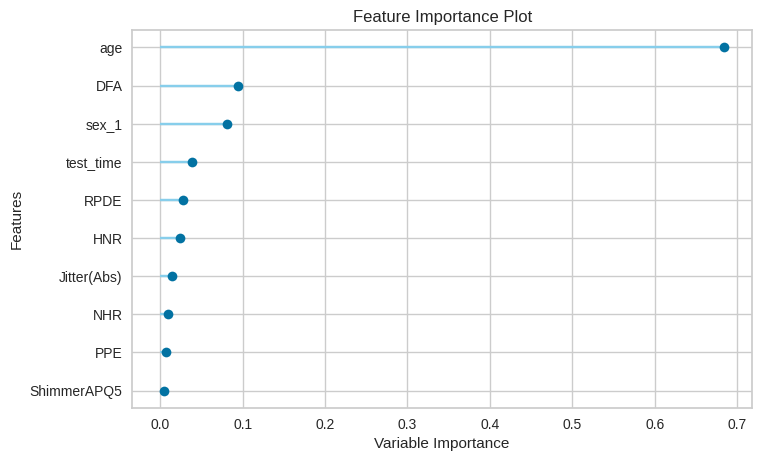

In [40]:
plot_model(tuned_rf, plot = 'feature')

In [41]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [42]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [43]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Predict on Test / Hold-out Sample**

In [44]:
predict_model(tuned_et)

Model    MAE      MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  3.392  19.8658  4.4571  0.8207  0.1997  0.1585

age   test_time  Jitter(%)  ...  sex_1  total_UPDRS      Label
0     66.0   72.412003    0.00662  ...    1.0    30.148001  32.055094
1     55.0  117.779999    0.00506  ...    0.0    26.663000  24.707999
2     65.0  159.429993    0.00346  ...    0.0    22.643999  20.126397
3     58.0   59.354000    0.01109  ...    0.0    19.000000  21.128480
4     61.0  149.839996    0.00297  ...    0.0    32.987999  30.463574
...    ...         ...        ...  ...    ...          ...        ...
1582  55.0  183.820007    0.00983  ...    0.0    26.103001  24.781492
1583  71.0   48.886002    0.00521  ...    0.0    54.556000  50.040609
1584  63.0  131.339996    0.00442  ...    0.0    42.688999  33.934647
1585  75.0   98.410004    0.00389  ...    0.0    42.231998  39.585925
1586  85.0  138.470001    0.00487  ...    1.0    24.870001  26.372669

[1587 rows x 19 columns]

In [45]:
predict_model(tuned_dt)

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Decision Tree Regressor  1.2533  8.5539  2.9247  0.9228  0.1288  0.0587

age   test_time  Jitter(%)  ...  sex_1  total_UPDRS      Label
0     66.0   72.412003    0.00662  ...    1.0    30.148001  32.072504
1     55.0  117.779999    0.00506  ...    0.0    26.663000  23.356438
2     65.0  159.429993    0.00346  ...    0.0    22.643999   8.058723
3     58.0   59.354000    0.01109  ...    0.0    19.000000  18.606118
4     61.0  149.839996    0.00297  ...    0.0    32.987999  32.498853
...    ...         ...        ...  ...    ...          ...        ...
1582  55.0  183.820007    0.00983  ...    0.0    26.103001  26.234209
1583  71.0   48.886002    0.00521  ...    0.0    54.556000  54.552249
1584  63.0  131.339996    0.00442  ...    0.0    42.688999  43.442769
1585  75.0   98.410004    0.00389  ...    0.0    42.231998  42.503769
1586  85.0  138.470001    0.00487  ...    1.0    24.870001  24.736875

[1587 rows x 19 columns]

In [46]:
predict_model(tuned_rf)

Model     MAE    MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  2.1948  9.351  3.0579  0.9156  0.1373  0.0992

age   test_time  Jitter(%)  ...  sex_1  total_UPDRS      Label
0     66.0   72.412003    0.00662  ...    1.0    30.148001  31.794573
1     55.0  117.779999    0.00506  ...    0.0    26.663000  23.041027
2     65.0  159.429993    0.00346  ...    0.0    22.643999  14.787241
3     58.0   59.354000    0.01109  ...    0.0    19.000000  15.812105
4     61.0  149.839996    0.00297  ...    0.0    32.987999  30.042580
...    ...         ...        ...  ...    ...          ...        ...
1582  55.0  183.820007    0.00983  ...    0.0    26.103001  25.513187
1583  71.0   48.886002    0.00521  ...    0.0    54.556000  50.687153
1584  63.0  131.339996    0.00442  ...    0.0    42.688999  38.955097
1585  75.0   98.410004    0.00389  ...    0.0    42.231998  42.027385
1586  85.0  138.470001    0.00487  ...    1.0    24.870001  26.501425

[1587 rows x 19 columns]

# **Finalize Models for Deployment**

In [47]:
final_et = finalize_model(tuned_et)

In [48]:
print(final_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [49]:
predict_model(final_et)

Model     MAE      MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  3.2094  17.2668  4.1553  0.8441  0.1876  0.1486

age   test_time  Jitter(%)  ...  sex_1  total_UPDRS      Label
0     66.0   72.412003    0.00662  ...    1.0    30.148001  31.099222
1     55.0  117.779999    0.00506  ...    0.0    26.663000  23.882253
2     65.0  159.429993    0.00346  ...    0.0    22.643999  19.220818
3     58.0   59.354000    0.01109  ...    0.0    19.000000  20.732077
4     61.0  149.839996    0.00297  ...    0.0    32.987999  31.064932
...    ...         ...        ...  ...    ...          ...        ...
1582  55.0  183.820007    0.00983  ...    0.0    26.103001  24.592903
1583  71.0   48.886002    0.00521  ...    0.0    54.556000  49.001450
1584  63.0  131.339996    0.00442  ...    0.0    42.688999  35.061643
1585  75.0   98.410004    0.00389  ...    0.0    42.231998  39.492514
1586  85.0  138.470001    0.00487  ...    1.0    24.870001  26.451023

[1587 rows x 19 columns]

In [50]:
final_dt = finalize_model(tuned_dt)

In [51]:
print(final_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


In [52]:
predict_model(final_dt)

Model     MAE     MSE    RMSE      R2  RMSLE    MAPE
0  Decision Tree Regressor  0.8037  2.4936  1.5791  0.9775  0.072  0.0346

age   test_time  Jitter(%)  ...  sex_1  total_UPDRS      Label
0     66.0   72.412003    0.00662  ...    1.0    30.148001  31.923708
1     55.0  117.779999    0.00506  ...    0.0    26.663000  25.269125
2     65.0  159.429993    0.00346  ...    0.0    22.643999  21.113204
3     58.0   59.354000    0.01109  ...    0.0    19.000000  14.878744
4     61.0  149.839996    0.00297  ...    0.0    32.987999  32.699843
...    ...         ...        ...  ...    ...          ...        ...
1582  55.0  183.820007    0.00983  ...    0.0    26.103001  26.225730
1583  71.0   48.886002    0.00521  ...    0.0    54.556000  54.552999
1584  63.0  131.339996    0.00442  ...    0.0    42.688999  43.435650
1585  75.0   98.410004    0.00389  ...    0.0    42.231998  42.294999
1586  85.0  138.470001    0.00487  ...    1.0    24.870001  24.870001

[1587 rows x 19 columns]

In [53]:
final_rf = finalize_model(tuned_rf)

In [54]:
print(final_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [55]:
predict_model(final_rf)

Model     MAE     MSE    RMSE      R2  RMSLE    MAPE
0  Random Forest Regressor  2.0056  7.4724  2.7336  0.9326  0.128  0.0917

age   test_time  Jitter(%)  ...  sex_1  total_UPDRS      Label
0     66.0   72.412003    0.00662  ...    1.0    30.148001  31.990753
1     55.0  117.779999    0.00506  ...    0.0    26.663000  23.765257
2     65.0  159.429993    0.00346  ...    0.0    22.643999  17.008962
3     58.0   59.354000    0.01109  ...    0.0    19.000000  16.212832
4     61.0  149.839996    0.00297  ...    0.0    32.987999  30.133295
...    ...         ...        ...  ...    ...          ...        ...
1582  55.0  183.820007    0.00983  ...    0.0    26.103001  25.116801
1583  71.0   48.886002    0.00521  ...    0.0    54.556000  53.023718
1584  63.0  131.339996    0.00442  ...    0.0    42.688999  38.418727
1585  75.0   98.410004    0.00389  ...    0.0    42.231998  41.926518
1586  85.0  138.470001    0.00487  ...    1.0    24.870001  26.521040

[1587 rows x 19 columns]

# **Predict on Unseen Data**

In [56]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

age  sex  test_time  total_UPDRS  ...     RPDE      DFA      PPE      Label
0   72    0     40.652       36.870  ...  0.53949  0.57243  0.19500  33.303313
1   72    0     54.640       37.857  ...  0.47712  0.54234  0.23844  34.758935
2   72    0     82.653       39.834  ...  0.46686  0.57984  0.19390  34.254731
3   72    0     96.633       41.034  ...  0.61348  0.60661  0.15881  35.302406
4   72    0    131.640       44.146  ...  0.52714  0.59220  0.18211  31.605600

[5 rows x 21 columns]

In [57]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, 'R2')

0.8432

In [58]:
unseen_predictions2 = predict_model(final_dt, data=data_unseen)
unseen_predictions2.head()
check_metric(unseen_predictions2.total_UPDRS, unseen_predictions2.Label, 'R2')

0.9361

In [59]:
unseen_predictions3 = predict_model(final_rf, data=data_unseen)
unseen_predictions3.head()
check_metric(unseen_predictions3.total_UPDRS, unseen_predictions3.Label, 'R2')

0.9201

# **Saving Models**

In [60]:
save_model(final_et,'Final ET Model 10Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=9,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i

In [61]:
save_model(final_dt,'Final DT Model 10Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse',
                                        max_depth=10, max_features=1.0,
                                        max_leaf_nodes=None,

In [62]:
save_model(final_rf,'Final RF Model 10Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=9,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=None,
                                   

# **Loading the Saved Model**

In [63]:
saved_final_et = load_model('Final ET Model 10Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [64]:
new_prediction = predict_model(saved_final_et, data=data_unseen)

In [65]:
new_prediction.head()

age  sex  test_time  total_UPDRS  ...     RPDE      DFA      PPE      Label
0   72    0     40.652       36.870  ...  0.53949  0.57243  0.19500  33.303313
1   72    0     54.640       37.857  ...  0.47712  0.54234  0.23844  34.758935
2   72    0     82.653       39.834  ...  0.46686  0.57984  0.19390  34.254731
3   72    0     96.633       41.034  ...  0.61348  0.60661  0.15881  35.302406
4   72    0    131.640       44.146  ...  0.52714  0.59220  0.18211  31.605600

[5 rows x 21 columns]

In [66]:
from pycaret.utils import check_metric
check_metric(new_prediction.total_UPDRS, new_prediction.Label, 'R2')

0.8432